## Rxday and ROME, all models together

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


switch = {
    'local_files': True, 
    'nci_files': False, 
    }

In [44]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

In [4]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)
rome

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 2070-01-01 12:00:00 ... 2099-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [5]:
model = 'GFDL-CM3'
if switch['local_files']:
    folder = home + '/Documents/data/cmip5/' + model

if switch['nci_files']:
    folder = '/g/data/k10/cb4968/data/cmip5/'+ model


fileName = model + '_pr_rxday_' + experiment + '.nc'
path = folder + '/' + fileName
rxday = xr.open_dataset(path)
rxday

<xarray.Dataset>
Dimensions:  (time: 30, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 2070-12-31 00:00:00 ... 2099-12-31 00:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    rx1day   (time, lat, lon) float32 ...
    rx5day   (time, lat, lon) float32 ...

In [6]:
rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

In [7]:
rxday_options = [
    'rx1day',
    # 'rx5day'
    ]
rxday_option = rxday_options[0]

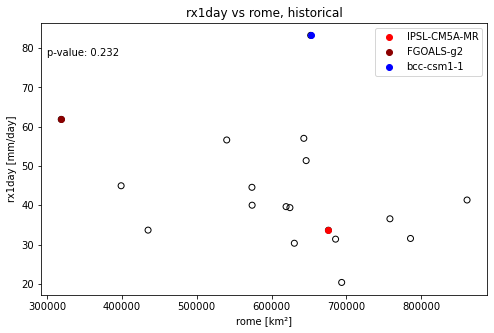

In [39]:
y= []
x= []
for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x = np.append(x, rome[rome_option].mean(dim='time'))

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y = np.append(y, rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time'))



fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e5, 78,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1

plt.title(rxday_option  + ' vs ' + rome_option + ', ' + experiment)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(rxday_option + ' [mm/day]')
plt.legend()



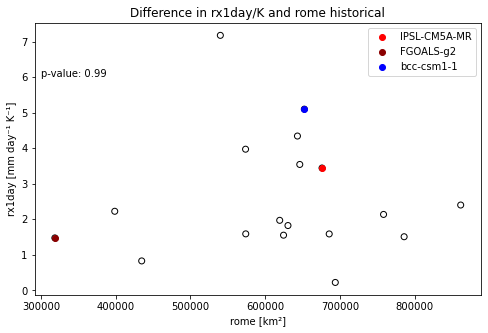

In [35]:
x, y_diff = [], []

for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x = np.append(x,  x_historical)


    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_historical = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_rcp = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e5, 6,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + rxday_option  + '/K and ' + rome_option + ' ' + experiment)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(rxday_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



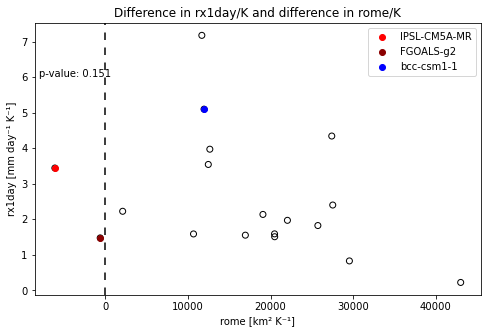

In [48]:
x_diff, y_diff = [], []

for model in models:
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x_diff = np.append(x_diff,  (x_rcp - x_historical) / tas_diff)


    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_historical = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_rcp = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x_diff,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x_diff,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(-8000, 6,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x_diff[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + rxday_option  + '/K and difference in ' + rome_option + '/K')
plt.axvline(0, color='k',linestyle= (0, (5, 5)))
plt.xlabel(rome_option  + ' [km\u00b2' + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.ylabel(rxday_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



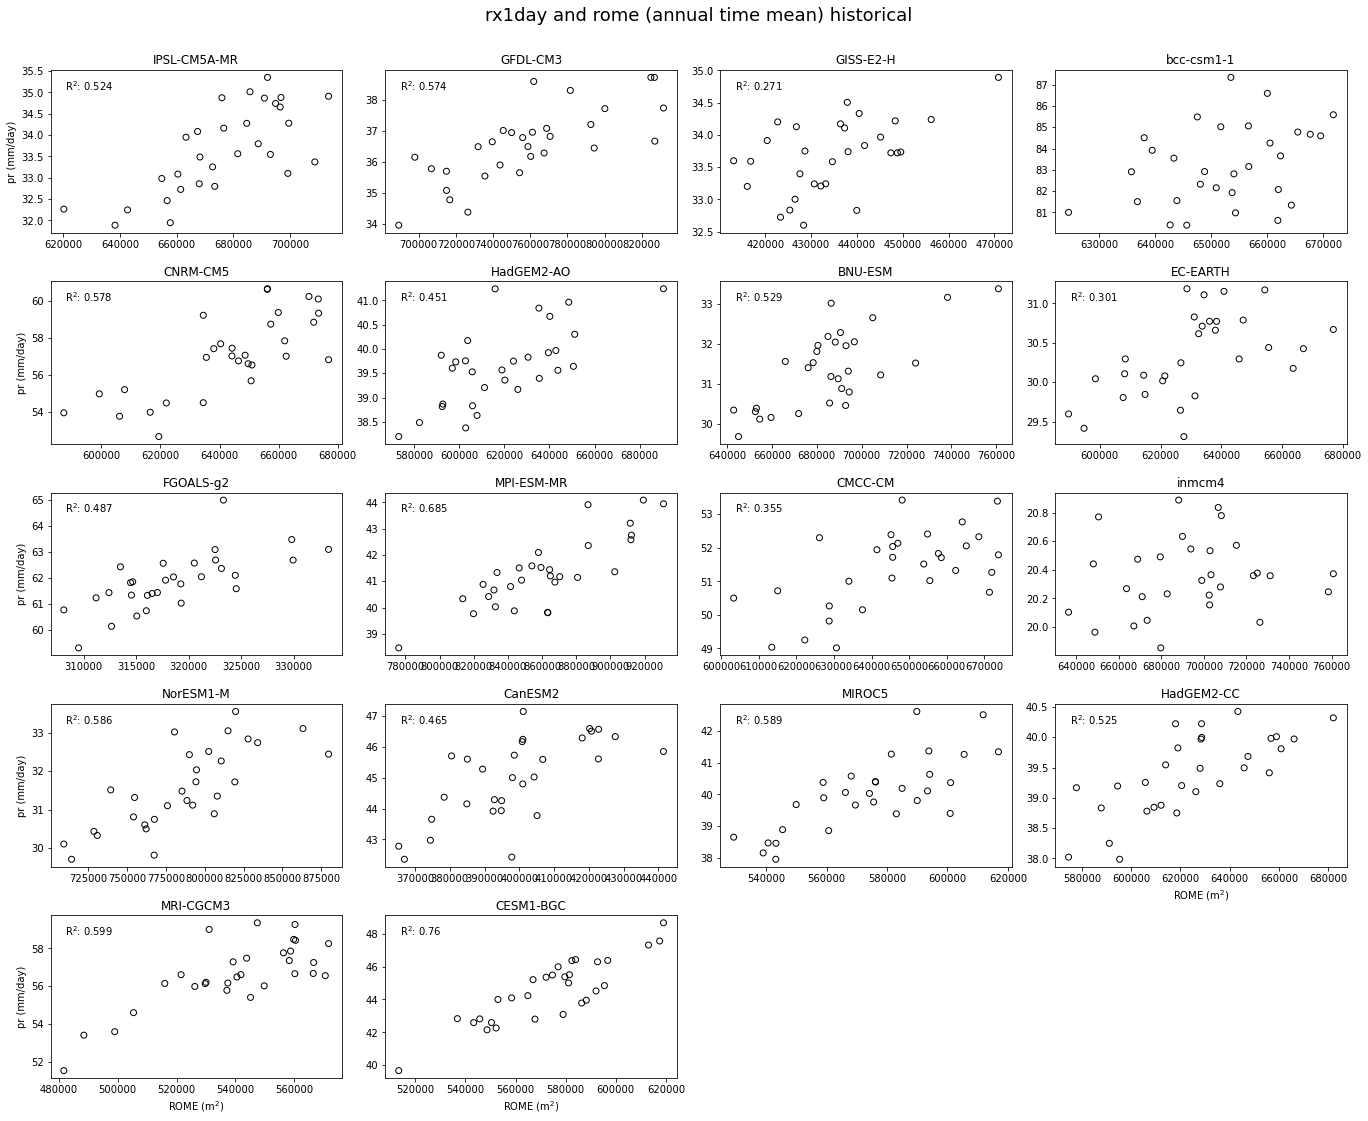

In [45]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(rxday_option + ' and ' + rome_option  + ' (annual time mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model


    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)


    ax= fig.add_subplot(5,4,i+1)
    
    x = rome[rome_option].resample(time='Y').mean(dim='time')
    y = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon'))
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('pr (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)